In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

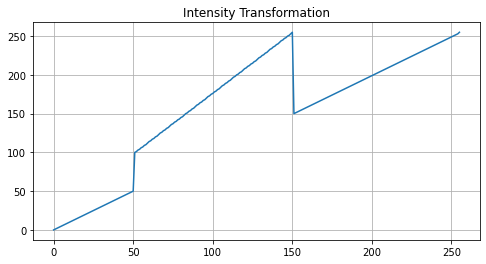

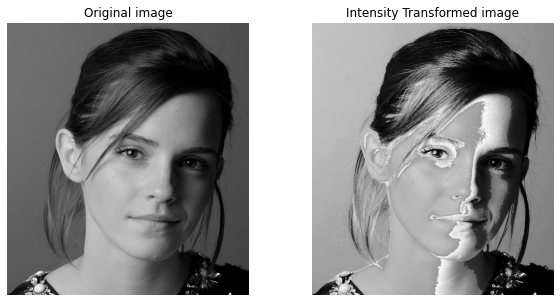

In [30]:
image1 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert image1 is not None

t1 = np.linspace(0, 50, 51)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
plt.subplots(1, 1, figsize = (8, 4))
plt.title("Intensity Transformation")
plt.grid("on")
plt.plot(t)

assert len(t) == 256
image_transformed = cv.LUT(image1, t)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image1)
cv.waitKey(1000)
cv.imshow("Image", image_transformed)
cv.waitKey(1000)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title("Intensity Transformed image")
ax[1].axis("off")

plt.show()

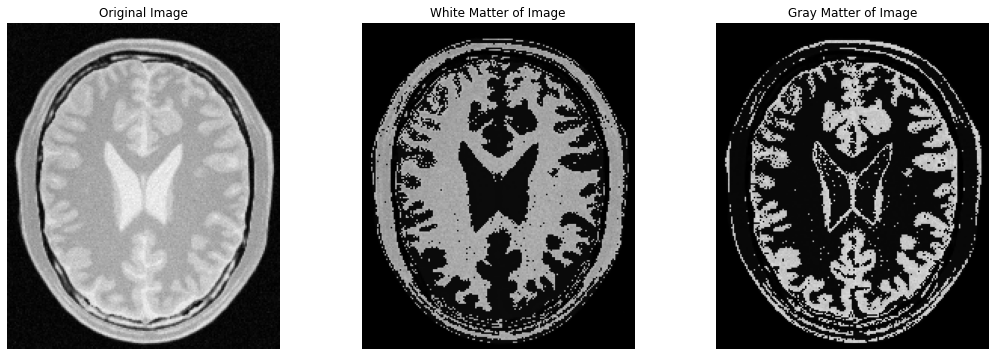

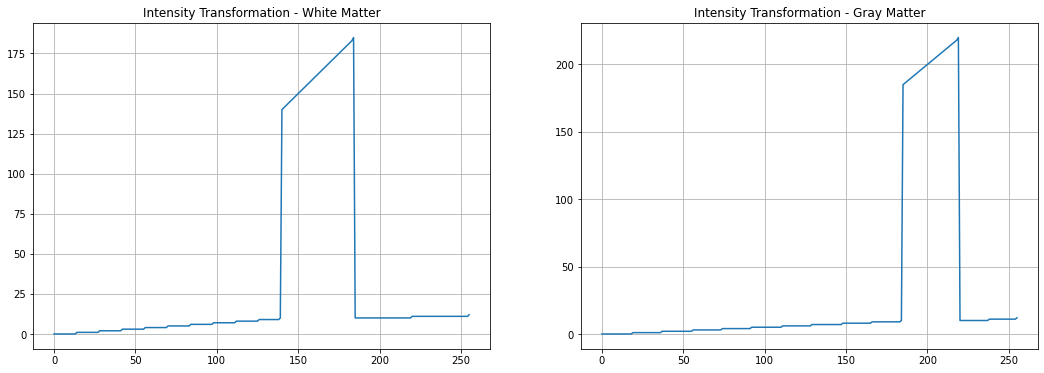

In [31]:
image2 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert image2 is not None

t1 = np.linspace(0, 10, 140)
t2 = np.linspace(140, 185, 45)
t3 = np.linspace(10, 12, 71)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

r1 = np.linspace(0, 10, 185)
r2 = np.linspace(185, 220, 35)
r3 = np.linspace(10, 12, 36)
r = np.concatenate((r1, r2, r3), axis = 0).astype(np.uint8)

assert len(t) == 256
image_t1 = cv.LUT(image2, t)

assert len(r) == 256
image_t2 = cv.LUT(image2, r)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image2)
cv.waitKey(1000)
cv.imshow("Image", image_t1)
cv.waitKey(1000)
cv.imshow("Image", image_t2)
cv.waitKey(1000)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize = (18, 6))

ax[0].imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(image_t1, cv.COLOR_BGR2RGB))
ax[1].set_title("White Matter of Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(image_t2, cv.COLOR_BGR2RGB))
ax[2].set_title("Gray Matter of Image")
ax[2].axis("off")

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation - White Matter")
ax[0].grid("on")

ax[1].plot(r)
ax[1].set_title("Intensity Transformation - Gray Matter")
ax[1].grid("on")


plt.show()

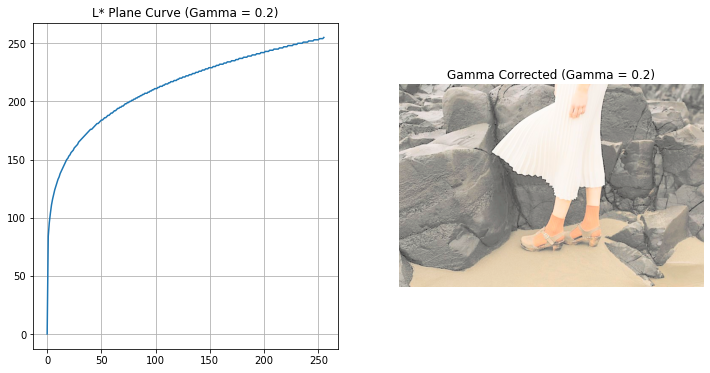

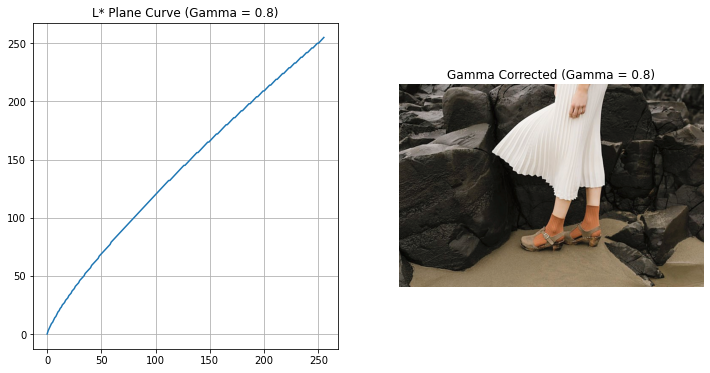

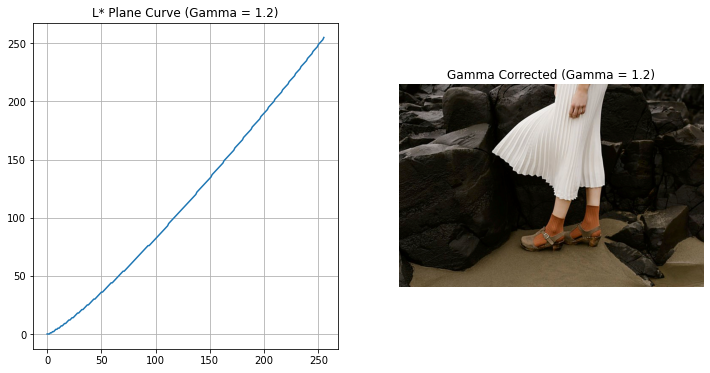

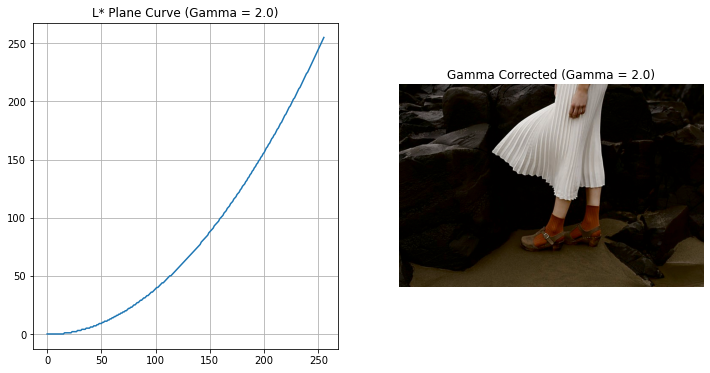

In [32]:
image3 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert image3 is not None

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image3)
cv.waitKey(1000)
cv.destroyAllWindows()

gamma = [0.2, 0.8, 1.2, 2.0]

lab = cv.cvtColor(image3, cv.COLOR_BGR2LAB)
L, A, B = cv.split(lab)

hist_gamma=[]

for i in gamma:
    lookUpTable = np.array([(p/255)**(i)*255 for p in range(0, 256)]).astype(np.uint8)
    
    L_G = cv.LUT(L, lookUpTable)
    lab_gamma = cv.merge([L_G, A, B])
    hist_gamma.append(cv.calcHist([lab_gamma],[0],None,[256],[0,256]))
    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2RGB)
    
    
    
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].plot(lookUpTable)
    ax[0].set_title("L* Plane Curve (Gamma = " + str(i) + ")")
    ax[0].grid("on")
    
    ax[1].imshow(img)
    ax[1].set_title("Gamma Corrected (Gamma = " + str(i) + ")")
    ax[1].axis("off")

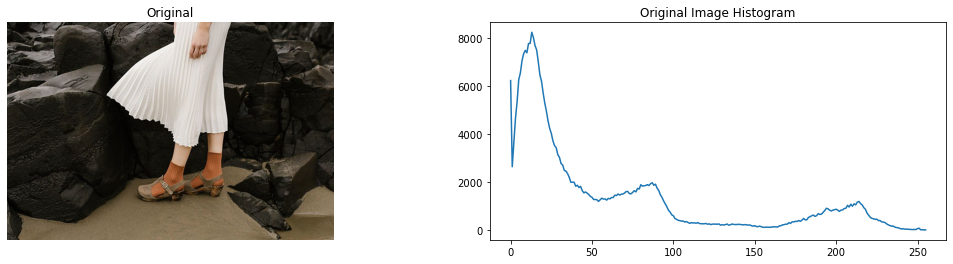

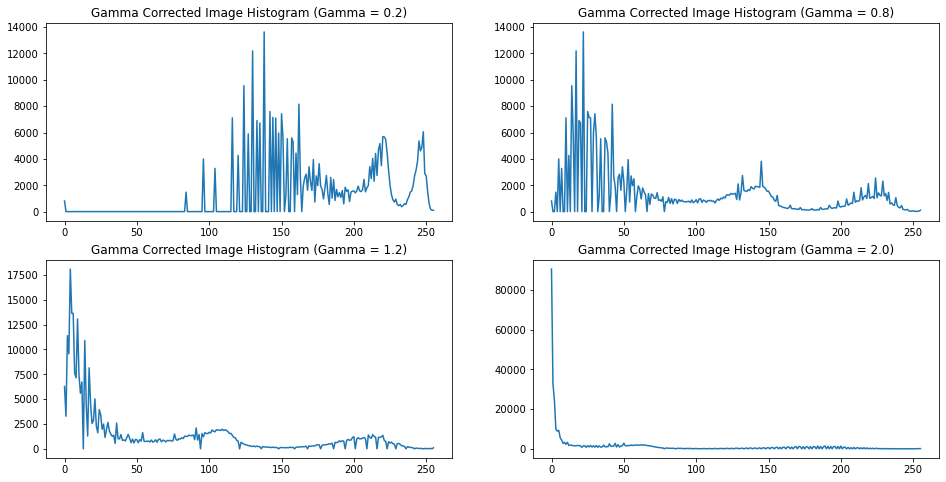

In [33]:
hist_image3 = cv.calcHist([image3], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
ax[0].imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
ax[0].axis("off")
ax[0].set_title("Original")

ax[1].plot(hist_image3)
ax[1].set_title("Original Image Histogram")

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for i in range(len(hist_gamma)):
    ax[i//2, i%2].plot(hist_gamma[i])
    ax[i//2, i%2].set_title("Gamma Corrected Image Histogram (Gamma = " + str(gamma[i]) + ")")

    

plt.show()

(04)